# Hypothesis Testing

The general steps in data analysis are as follows:

1. Visually inspect the data.
2. Find extreme examples (i.e. outliers) and consider them carefully.
3. Determine the data-type of the values.
4. If the data are continuous, check whether or not they are normally distributed.
5. Select and apply the appropriate test, or apply a model-based analysis of the data.

Before we discuss step 5, we need to consider first the previous steps.


# Normality Check

Statistical hypothesis tests are grouped into $parametric$ tests, and $non-parametric$ tests.  Parametric tests assume that the data can be well described by some underlying distribution (uniform, normal, Poisson, or other).  So, if we are going to use tests that are based on an underlying normal distribution, the first thing that we have to do is check to see if that is a reasonable assumption.

In [1]:
# Import the required packages, 
# with their conventional names 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats 

# Generate some data ... 3000 samples chosen from a Gaussian distribution with a mean of 100 and a sigma of 10.
npts = 3000
mu = 100.0
sigma = 10.0
x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)

# Step 1: Sort the data from smallest to largest

x.sort()

# Step 2: Create an array of z-scores for the data

zdata = (x-mu)/sigma

# Step 2: Create an array of z-scores (quantiles) corresponding to the length
#         of the data array

i = np.arange(1/len(x),1,1/(len(x)+1))
quantiles = stats.norm.ppf(i)

# Step 3: Plot the results ... if the data is normally distributed, we expect the data
#         to fall along the line y=x

plt.plot(quantiles,zdata,'.')

zmin = zdata.min()
zmax = zdata.max()
xt = np.arange(zmin, zmax, 0.01) 
yt = xt
plt.plot(xt,yt)

NormaltestResult(statistic=1.3707993099334181, pvalue=0.5038888076632211)

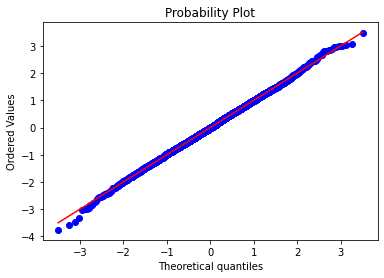

In [2]:
# Or, we could just have Python stats package do it for us all in one step!

stats.probplot(zdata,plot=plt)
stats.normaltest(zdata)

NormaltestResult(statistic=194.2063606939909, pvalue=6.7394522410552094e-43)

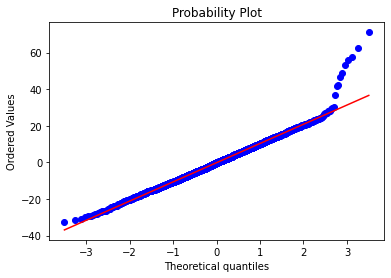

In [3]:
#
# Let's now create a distribution that has some outliers!!!
#

mu=0
sigma=10

npts = 3000
x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)
nptso = 10
xoutliers = stats.norm.rvs(size=nptso,loc=mu+5*sigma,scale=sigma)

npts=npts+nptso

xmix = np.concatenate([x,xoutliers])

stats.probplot(xmix,plot=plt)
stats.normaltest(xmix)

# Outliers

There is no unique definition for outliers.  However, if the data is normally distributed, then we have a better sense of what it means, numerically, to be an outlier.

# Steps in Hypothesis Testing

The general procedure for hypothesis tests can be described as follows:

1.  A random sample is collected from a population.
2.  A null hypothesis is formed.  Particular attention is paid at this point as to whether we are interested in the "=", ">", or "<" cases.
3.  A test statistic is calculated, of which we know the probability distribution.
4.  A comparison is made between the observed value of the test statistic and the corresponding distribution.  In particular, we can calculate the likelihood that a value as extreme (or more extreme) than the observed one is found by chance.  This is called the "p-value".
5. If the p-value is LESS THAN alpha, then we reject the null hypothesis.  Otherwise, we fail to reject the null hypothesis.

# Example 1 - Comparing the Sample Mean to a Predicted Population Mean - "=" Case.

In [4]:
# Step 1:  Collect data

scores = np.array([109.4,76.2,128.7,93.7,85.6,117.7,117.2,87.3,100.3,55.1])

xbar = scores.mean()
sem = stats.sem(scores)
df = len(scores)-1

# Step 2:  Null hypothesis
# "The expected value of mu is 110.  We assume that there is no difference between
#  the population mean, and a value of 110."
#
#  Thus, we are considering the "=" case.  We are testing whether or not the data
#  supports the null hypothesis that "mu=110".
#
#  Extreme values would correspond to sample means that are EITHER much larger than
#  110, or much smaller than 110.

mu = 110

# Step 3:  Test statistic
# Since the value of sigma is unknown, and we are interested in the mean of the 
# distribution, we choose the t-statistic.

alpha = 0.05

tvalue = (xbar-mu)/sem

print ("Expected population mean = %0.2f" % mu)
print ("Mean Value from data = %0.2f" % xbar)
print ("Standard Error in the mean = %0.2f" %sem)
print ("T value from data = %0.2f" %tvalue)

# Step 4: Calculate the critical t-values, and the p-value.
tdist = stats.t(df)
tlow = tdist.ppf(alpha/2.0)
thigh = tdist.ppf(1-alpha/2.0)

print ("Critical T values = %0.2f, %0.2f" % (tlow,thigh))

# NOTE:  We have to multiply by two in this base ("="), because we have to take
#        into account the upper tail as well as the lower tail.
#
pvalue = 2.0*tdist.cdf(-np.abs(tvalue))

print ("P value = %0.3f" % pvalue)

# Step 5:  Conclusion
#
# a) Since the t-value from the data (-1.84) falls between the two limits from the
#    t-distribution (-2.26 to 2.26), we conclude that the data is consistent with
#    a population mean of 110, and we FAIL TO REJECT THE NULL HYPOTHESIS.
# b) Since the p-value is GREATER THAN alpha, we fail to reject the null hypothesis.

Expected population mean = 110.00
Mean Value from data = 97.12
Standard Error in the mean = 7.02
T value from data = -1.84
Critical T values = -2.26, 2.26
P value = 0.100


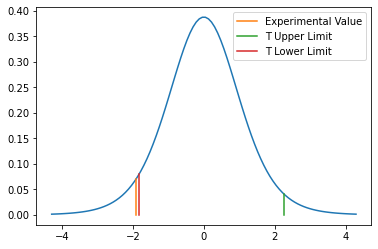

In [12]:
# Let's get a picture of what's going on here ....
x = np.linspace(stats.t.ppf(0.001,df),stats.t.ppf(.999,df),100)
td = stats.t.pdf(x,df)

stat_line_x = np.array([tvalue,tvalue])
stat_line_y = np.array([0,stats.t.pdf(tvalue,df)])

upper_line_x = np.array([thigh,thigh])
upper_line_y = np.array([0,stats.t.pdf(thigh,df)])

lower_line_x = np.array([tlow,tlow])
lower_line_y = np.array([0,stats.t.pdf(tlow,df)])

plt.plot(x,td)
plt.plot(stat_line_x,stat_line_y,label="Experimental Value")
plt.plot(upper_line_x,upper_line_y,label="T Upper Limit")
plt.plot(lower_line_x,lower_line_y,label="T Lower Limit")
plt.legend()

Another way to assess/analyze this data is to ask a slightly different question.  Above, we answered the question, "Is the data consistent with mu = 110?", and the answer to that question was "We cannot say that it is not."  Another question that we could ask is - "What range of mu values is the data consistent with?"  That is, we could calculate a CONFIDENCE INTERVAL, which would represent the precise answer to this question.  In many senses, this is a more useful way to analyze the data.

In [6]:
cl = 1 - alpha
c_interval = stats.t.interval(cl,df,loc=xbar,scale=sem)

print ("95 Percent Confidence Interval = (%0.3f,%0.3f)" % c_interval)
print ("The data is consistent with any value of mu between %0.3f and %0.3f, at the 95 Percent confidence level." % c_interval)

# The stats package has some cool built-in functions to get the pValue for a single sample t-test quickly!!!!
# The two parameters passed to this function are (a) the original data array, and (b) the value of mu to test.
# The function assumes a TWO-TAILED test (i.e. the "=" case).

t, pVal = stats.ttest_1samp(scores,mu)
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal))

t, pVal = stats.ttest_1samp(scores,c_interval[0])
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal))

t, pVal = stats.ttest_1samp(scores,c_interval[1])
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal))

95 Percent Confidence Interval = (81.251,112.989)
The data is consistent with any value of mu between 81.251 and 112.989, at the 95 Percent confidence level.
T-value = -1.836, P-value = 0.100
T-value = 2.262, P-value = 0.050
T-value = -2.262, P-value = 0.050


# Example 2 - Comparing the Sample Mean to a Predicted Population Mean - "<" Case.

In [7]:
# Step 1:  Collect data

mpg = np.array([22.4,26.2,28.7,23.7,25.6,27.7,27.2,27.3,20.3,25.1])

xbar = mpg.mean()
sem = stats.sem(mpg)
df = len(mpg)-1

# Step 2:  Null hypothesis
# "The expected value of mu is 27 mpg  We assume that the actual population is NOT LESS THAN 27 mpg."
#
#  Thus, we are considering the "<" case.  We are testing whether or not the data
#  supports the null hypothesis that "mu >= 27 mpg".
#
#  Extreme values would correspond to sample means that are much smaller than 27.

mu = 27

# Step 3:  Test statistic
# Since the value of sigma is unknown, and we are interested in the mean of the 
# distribution, we choose the t-statistic.

alpha = 0.05

tvalue = (xbar-mu)/sem

print ("Expected population mean = %0.2f" % mu)
print ("Mean Value from data = %0.2f" % xbar)
print ("Standard Error in the mean = %0.2f" %sem)
print ("T value from data = %0.2f" %tvalue)

# Step 4: Calculate the critical t-values, and the p-value.
tdist = stats.t(df)
tlow = tdist.ppf(alpha)

print ("Critical T value = %0.2f" % (tlow))

pvalue = tdist.cdf(-np.abs(tvalue))

print ("P value = %0.3f" % pvalue)

# Step 5:  Conclusion
#
# a) Since the t-value from the data (-1.91) falls below the limit from the
#    t-distribution (-1.83), we conclude that the data is NOT consistent with
#    a population mean >= 27mpg, and we REJECT THE NULL HYPOTHESIS.
# b) Since the p-value is LESS THAN alpha, we reject the null hypothesis.

Expected population mean = 27.00
Mean Value from data = 25.42
Standard Error in the mean = 0.83
T value from data = -1.91
Critical T value = -1.83
P value = 0.044


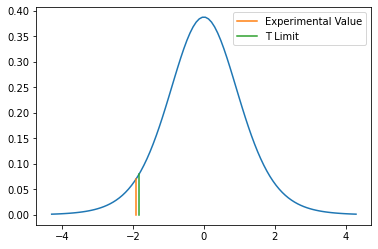

In [11]:
# Let's get a picture of what's going on here ....

x = np.linspace(stats.t.ppf(0.001,df),stats.t.ppf(.999,df),100)
td = stats.t.pdf(x,df)

stat_line_x = np.array([tvalue,tvalue])
stat_line_y = np.array([0,stats.t.pdf(tvalue,df)])

lower_line_x = np.array([tlow,tlow])
lower_line_y = np.array([0,stats.t.pdf(tlow,df)])

plt.plot(x,td)
plt.plot(stat_line_x,stat_line_y,label="Experimental Value")
plt.plot(lower_line_x,lower_line_y,label="T Limit")
plt.legend()

In [ ]:
cl = 1 - 2*alpha
c_interval = stats.t.interval(cl,df,loc=xbar,scale=sem)

print ("95 Percent Confidence Limit = (%0.3f)" % c_interval[1])
print ("For any value of mu greater than %0.3f, we reject the null hypothesis, at the 95 Percent confidence level." % c_interval[1])

In [ ]:
# The stats package has some cool built-in functions to get the pValue for a single sample t-test quickly!!!!
# The two parameters passed to this function are (a) the original data array, and (b) the value of mu to test.
# The function assumes a TWO-TAILED test (i.e. the "=" case), so here we have to divide the p-value by 2.

t, pVal = stats.ttest_1samp(mpg,mu)
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal/2.0))

t, pVal = stats.ttest_1samp(mpg,c_interval[0])
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal/2.0))

t, pVal = stats.ttest_1samp(mpg,c_interval[1])
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal/2.0))